In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.pyplot import figure
import sys
import math
import pandas as pd
from math import factorial as fc

In [2]:
def in_float(s = 'Введите число', integer = False, check = [False, 0, 0]):
    flag = True
    while flag:
        flag = False
        try:
            if integer:
                val = int(input(s +': '))
            else:
                val = float(input(s +': '))
            if check[0] and (val < check[1] or val > check[2]):
                raise ValueError
        except ValueError:
            flag = True
            if check[0]:
                print(f'Попробуйте снова! Введенное число должно принадлежать интервалу [{check[1]}; {check[2]}]\n')
            else:
                print(f'Попробуйте снова!\n')
    return val

def parse():
    flag = True
    while flag:
        path = input('Путь:\n').strip()
        try:
            a = genfromtxt(path, delimiter=',')
            if True in np.isnan(a) or a.shape[0] != 2:
                raise ValueError
            return a   
        except ValueError:
            print('В файле должно быть 2 строчки, в каждой одинаковое количество чисел\n')
        except OSError:
            print('Такого файла нет.\n')
        print('Попробуйте снова!\n')

def input_vals():
    n = in_float(s = 'Введите количество точек', integer = True)
    print()
    a = []
    for i in range(int(n)):
        a.append([in_float('x'), in_float('y')])
        print()
    return np.array(a).transpose()

def to_df(array, f, eps, f_type = 'f'):
    np_arr = np.concatenate((array, [f], [eps]), axis=0)
    return pd.DataFrame(data=np_arr, index=["X", "Y", f_type, 'eps'])


def newline(p1, p2, color = 'black'):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = color)
    ax.add_line(l)
    return l

def check_and_draw(x, y, approximate_function, point):
    fig, ax = plt.subplots()   
    xnew=np.linspace(np.min(x),np.max(x),100)
    ynew=[approximate_function(x,y,i) for i in xnew]
    plt.plot(x,y,'o', label = 'Входные точки')
    plt.plot(xnew,ynew, label = 'Функция аппр.')
    plt.plot(point[0], point[1], '.', markersize=12, label = 'Аппроксимация')
    plt.title(approximate_function)
    ax.legend() 
    plt.grid(True)
    plt.show()

In [3]:
def interpolate_lagrange(x, y, x_cur) :
    res = 0.0
    for i in range (0, len(x)):
        p = 1.0
        for j in range (0, len(x)):
            if(i != j):
                p *= (x_cur - x[j])/(x[i]-x[j])
        res += p*y[i]
    return res

def coef(y, n, i):
    if n == 0:
        return (y[i + 1] - y[i])
    return (coef(y, n - 1, i + 1) - coef(y, n - 1, i))

def newton_forward_interpolation(x, y, x_cur):
    i = 0
    n = len(x) - 1
    t = (x_cur - x[i]) / (x[1] - x[0])
    return y[i] + sum(np.prod([t - j for j in range(k)]) / math.factorial(k) * coef(y, k - 1, i) for k in range(1, n - i + 1))

def newton_backward_interpolation(x, y, x_cur):
    n = len(x) - 1
    t = (x_cur - x[n]) / (x[1] - x[0])
    return y[n] + sum(np.prod([t + j for j in range(k)]) / math.factorial(k) * coef(y, k - 1, n - k) for k in range(1, n + 1))
    
def interpolate_newton(x, y, x_cur):
    if x_cur > x[int((x[-1]+x[0])/2)]:
      return newton_backward_interpolation(x, y, x_cur)
    else:
      return newton_forward_interpolation(x, y, x_cur)

In [4]:
def run():
    again = True
    while again:
        again = False
        in_type = input('Введите:\n\t* k - если вводить с клавиатуры\n\t* f - если вводить из файла\n')
        if in_type.strip() == 'k':
            data = input_vals()
        elif in_type.strip() == 'f':
            data = parse()
        else:
            print('Введено неверно, попробуйте снова.')
            again = True
    print(f'Итоговый сет данных:\n{data[0]}\n{data[1]}')

    cur_x = in_float('Число, для которого интерполировать значение: ', check = [True, min(data[0]), max(data[0])])
    
    lagrange_result = interpolate_lagrange(data[0],data[1],cur_x)
    print(f'Lagrange\nОтвет методом Лагранжа: {lagrange_result}')
    check_and_draw(data[0], data[1], interpolate_lagrange, [cur_x, lagrange_result])
    print()

    newtone_result = interpolate_newton(data[0],data[1],cur_x)
    print(f'Newtone\nОтвет методом Ньютона: {newtone_result}')
    check_and_draw(data[0], data[1], interpolate_newton, [cur_x, newtone_result])

Введите:
	* k - если вводить с клавиатуры
	* f - если вводить из файла
f
Путь:
data.txt
Итоговый сет данных:
[0.1 0.2 0.3 0.4 0.5]
[1.25 2.38 3.79 5.44 7.14]
Число, для которого интерполировать значение: : 0.15
Lagrange
Ответ методом Лагранжа: 1.783359375


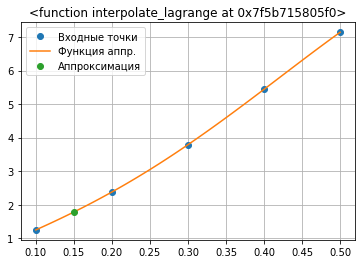


Newtone
Ответ методом Ньютона: 1.7833593750000007


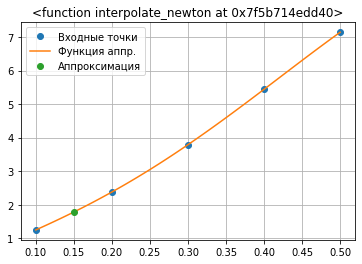

In [5]:
run()